<a href="https://colab.research.google.com/github/GabyGarPa/Fourier-/blob/main/Copia_de_Ejemplos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimización con scipy

In [ ]:
%matplotlib inline

In [ ]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

## Problema 17

# c)
Consideremos el siguiente programa:

Maximizar: $(1-x^2+y^2)$, sujeta a la restricción: $x \geq 2$ y $x\geq 2$



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return -(1 - x[0]**2 - x[1]**2)  # Función a maximizar

x = np.linspace(2, 5, 150)  # Consideramos valores de x entre 2 y 5
y = np.linspace(3, 6, 150)  # Consideramos valores de y entre 3 y 6
X, Y = np.meshgrid(x, y)
constraint_x = X >= 2  # Restricción x >= 2
constraint_y = Y >= 3  # Restricción y >= 3

# Aplicar restricciones a la función
Z_constrained = np.where(np.logical_and(constraint_x, constraint_y), f(np.vstack([X.ravel(), Y.ravel()])), np.nan)
Z_constrained = Z_constrained.reshape((150, 150))

plt.figure(figsize=(8, 6))
plt.contourf(X, Y, Z_constrained, 50, cmap='viridis')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Maximización sujeta a x >= 2, y >= 3')
plt.show()


ValueError: ignored

# d)
Consideremos el siguiente programa:

Minimizar: $4Ln(x^2+2)$, sujeta a la restricción: $x^2+y \geq 2 $ y $ x \geq 1 $



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 4 * np.log(x[0]**2 + 2) + x[1]**2  # Función a minimizar

x = np.linspace(1, 5, 150)  # Consideramos valores de x entre 1 y 5
y = np.linspace(-1, 5, 150)  # Consideramos valores de y entre -1 y 5
X, Y = np.meshgrid(x, y)
constraint_1 = X**2 + Y >= 2  # Restricción x^2 + y >= 2
constraint_2 = X >= 1  # Restricción x >= 1

# Aplicar restricciones a la función
Z_constrained = np.where(np.logical_and(constraint_1, constraint_2), f(np.vstack([X.ravel(), Y.ravel()])), np.nan)
Z_constrained = Z_constrained.reshape((150, 150))

plt.figure(figsize=(8, 6))
plt.contourf(X, Y, Z_constrained, 50, cmap='viridis')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Minimización sujeta a x^2 + y >= 2, x >= 1')
plt.show()


# a)
Consideremos el siguiente programa:

Maximizar: $(x^2+y^2+y-1)$, sujeta a la restricción: $x^2+{y^2} \leq 1$



In [ ]:
def f(x):
    #Aqui vamos a escribir la función que se va maximizar
    return (x[0]**2+x[1]**2+x[1]-1)

<ipython-input-4-d7a0697cbf60>:9: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(x, np.sqrt(1.0-x**2), 'k:', linewidth=1)
<ipython-input-4-d7a0697cbf60>:10: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(x, -np.sqrt(1.0-x**2), 'k:', linewidth=1)


(-1.1, 1.1, -1.1, 1.1)

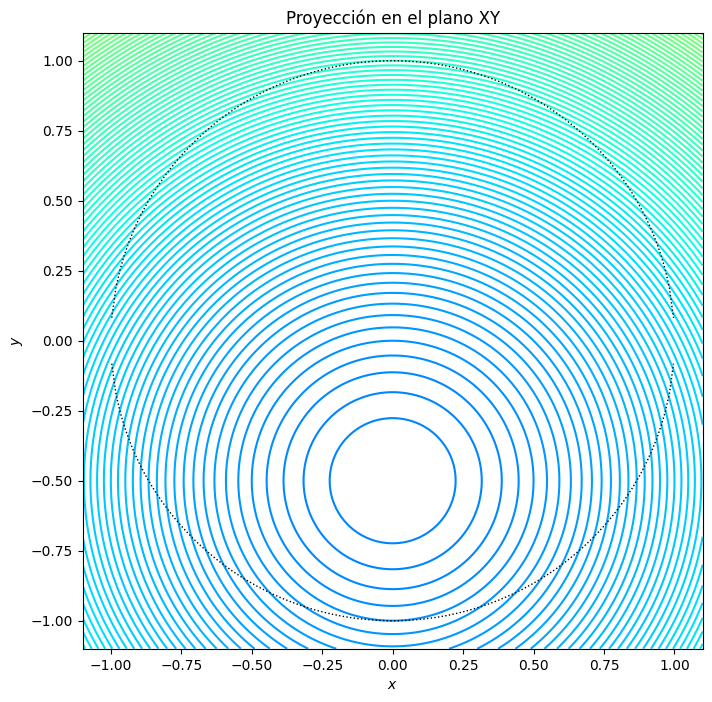

In [ ]:
x = np.linspace(-1.1, 1.1, 150)
y = np.linspace(-1.1, 1.1, 150)
X, Y = np.meshgrid(x, y)
Z = f(np.vstack([X.ravel(), Y.ravel()])).reshape((150,150))
plt.figure(figsize=(8,8))
plt.contour(X, Y, Z, np.arange(-5,10, 0.05), cmap='jet');
#tenemos que restriccion es la ec. de un circulo, entonces debemos colocar
#sqrt(1-x**2)
plt.plot(x, np.sqrt(1.0-x**2), 'k:', linewidth=1)
plt.plot(x, -np.sqrt(1.0-x**2), 'k:', linewidth=1)
plt.xlabel('$x$'); plt.ylabel('$y$');
plt.title("Proyección en el plano XY")
plt.axis([-1.1,1.1,-1.1,1.1])

In [ ]:
cons = ({'type': 'eq',
         'fun' : lambda x: np.array([x[0] + 0.5*x[1]**2-2.0])})#,
         #'jac' : lambda x: np.array([1.0, 2.0*x[1]])})

bnds = ((-40, 4.0), (-4.0, 4.0))

In [ ]:
x0 = [0, 2.5]

In [ ]:
ux = opt.minimize(f, x0, constraints=None)
ux

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -1.2499999999999678
        x: [-1.770e-07 -5.000e-01]
      nit: 2
      jac: [-3.427e-07 -4.470e-08]
 hess_inv: [[ 1.000e+00  2.951e-08]
            [ 2.951e-08  5.000e-01]]
     nfev: 9
     njev: 3

In [ ]:
cx = opt.minimize(f, x0, bounds=bnds, constraints=cons)
cx

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 3.250000000000983
       x: [ 1.500e+00  1.000e+00]
     nit: 8
     jac: [ 3.000e+00  3.000e+00]
    nfev: 27
    njev: 8

## b)

Consideremos el siguiente programa:

Maximizar: xyz, sujeta a la restricción: $x^2+{y^2}+ z^2\leq 1$


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def f(x):
    return -(x[0] + x[1] + x[2])  # Se cambia la función a maximizar

In [ ]:
x = np.linspace(-1.1, 1.1, 150)
y = np.linspace(-1.1, 1.1, 150)
z = np.linspace(-1.1, 1.1, 150)
X, Y, Z = np.meshgrid(x, y, z)
constraint = X**2 + Y**2 + Z**2  # Restricción

# Aplicar la restricción a la función
Z_constrained = np.where(constraint <= 1, f(np.vstack([X.ravel(), Y.ravel(), Z.ravel()])), np.nan)
Z_constrained = Z_constrained.reshape((150, 150, 150))

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.contourf(X, Y, Z_constrained.max(axis=2), 50, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Maximización sujeta a x^2 + y^2 + z^2 <= 1')

plt.show()


ValueError: ignored